In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading CSVs Datasets.

In [86]:
Cab_Data= pd.read_csv("Cab_Data.csv")
Customer_Data= pd.read_csv("Customer_ID.csv")
Transaction_data= pd.read_csv("Transaction_ID.csv")
City_Data= pd.read_csv("City.csv")

## Merge the datasets

In [87]:
combined_df= pd.merge(Transaction_data, Customer_Data)

In [88]:
combined_df= pd.merge(combined_df, Cab_Data)

In [89]:
combined_df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


In [90]:
City_Company= pd.merge(City_Data, Cab_Data, left_on="City", right_on=["City"])

In [91]:
City_Company.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip
0,NEW YORK NY,"8,405,837","302,149",10000139,2016-01-08,Pink Cab,17.85,242.90,198.135
1,NEW YORK NY,"8,405,837","302,149",10000140,2016-01-09,Pink Cab,25.30,407.21,255.530
2,NEW YORK NY,"8,405,837","302,149",10000141,2016-01-06,Pink Cab,16.32,236.41,186.048
3,NEW YORK NY,"8,405,837","302,149",10000142,2016-01-04,Pink Cab,12.43,194.61,144.188
4,NEW YORK NY,"8,405,837","302,149",10000143,2016-01-09,Pink Cab,29.70,434.57,350.460


# Reconstruct  and Clean the DataFrames

In [92]:
combined_df= combined_df[["Company", "Customer ID", "Transaction ID", "Gender", "Age", 
                              "Income (USD/Month)","City", "Date of Travel", 'KM Travelled', 'Cost of Trip',
                             'Price Charged', 'Payment_Mode']]

In [93]:
combined_df.head()

,Company,Customer ID,Transaction ID,Gender,Age,Income (USD/Month),City,Date of Travel,KM Travelled,Cost of Trip,Price Charged,Payment_Mode
0,Pink Cab,29290,10000011,Male,28,10813,ATLANTA GA,2016-01-08,30.45,313.6350,370.95,Card
1,Yellow Cab,29290,10351127,Male,28,10813,ATLANTA GA,2018-07-21,26.19,317.4228,598.70,Cash
2,Yellow Cab,29290,10412921,Male,28,10813,ATLANTA GA,2018-11-23,42.55,597.4020,792.05,Card
3,Pink Cab,27703,10000012,Male,27,9237,ATLANTA GA,2016-01-06,28.62,334.8540,358.52,Card
4,Yellow Cab,27703,10320494,Male,27,9237,ATLANTA GA,2018-04-21,36.38,467.1192,721.10,Card


### Check and clean the dates range from 31/01/2016 to 31/12/2018

#### Change Date of Travel column type to datetime.

In [94]:
Cab_Data['Date of Travel'] = pd.to_datetime(Cab_Data['Date of Travel'])

In [95]:
Cab_Data.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [96]:
combined_df = combined_df[combined_df["Date of Travel"]>= "1/31/2016"]

In [97]:
combined_df= combined_df.drop(['Income (USD/Month)'], axis = 1)

In [98]:
combined_df= combined_df.drop(['Transaction ID'], axis = 1)

In [99]:
combined_df.head()

,Company,Customer ID,Gender,Age,City,Date of Travel,KM Travelled,Cost of Trip,Price Charged,Payment_Mode
0,Pink Cab,29290,Male,28,ATLANTA GA,2016-01-08,30.45,313.6350,370.95,Card
1,Yellow Cab,29290,Male,28,ATLANTA GA,2018-07-21,26.19,317.4228,598.70,Cash
2,Yellow Cab,29290,Male,28,ATLANTA GA,2018-11-23,42.55,597.4020,792.05,Card
3,Pink Cab,27703,Male,27,ATLANTA GA,2016-01-06,28.62,334.8540,358.52,Card
4,Yellow Cab,27703,Male,27,ATLANTA GA,2018-04-21,36.38,467.1192,721.10,Card


In [100]:
City_Company= City_Company.drop(['Transaction ID'], axis = 1)

In [101]:
City_Company= City_Company.drop(['Date of Travel'], axis = 1)

In [102]:
City_Company= City_Company.drop(['KM Travelled'], axis = 1)

In [103]:
City_Company= City_Company.drop(['Price Charged'], axis = 1)

In [104]:
City_Company= City_Company.drop(['Cost of Trip'], axis = 1)

In [105]:
City_Company.head()

,City,Population,Users,Company
0,NEW YORK NY,"8,405,837","302,149",Pink Cab
1,NEW YORK NY,"8,405,837","302,149",Pink Cab
2,NEW YORK NY,"8,405,837","302,149",Pink Cab
3,NEW YORK NY,"8,405,837","302,149",Pink Cab
4,NEW YORK NY,"8,405,837","302,149",Pink Cab


### Profit calculation

In [106]:
combined_df["Profit"]=combined_df["Price Charged"]-combined_df["Cost of Trip"]
combined_df

,Company,Customer ID,Gender,Age,City,Date of Travel,KM Travelled,Cost of Trip,Price Charged,Payment_Mode,Profit
0,Pink Cab,29290,Male,28,ATLANTA GA,2016-01-08,30.45,313.6350,370.95,Card,57.3150
1,Yellow Cab,29290,Male,28,ATLANTA GA,2018-07-21,26.19,317.4228,598.70,Cash,281.2772
2,Yellow Cab,29290,Male,28,ATLANTA GA,2018-11-23,42.55,597.4020,792.05,Card,194.6480
3,Pink Cab,27703,Male,27,ATLANTA GA,2016-01-06,28.62,334.8540,358.52,Card,23.6660
4,Yellow Cab,27703,Male,27,ATLANTA GA,2018-04-21,36.38,467.1192,721.10,Card,253.9808
...,...,...,...,...,...,...,...,...,...,...,...
359387,Yellow Cab,38520,Female,42,SEATTLE WA,2018-01-07,16.66,213.9144,261.18,Card,47.2656
359388,Yellow Cab,12490,Male,33,SILICON VALLEY,2018-01-03,13.72,172.8720,277.97,Cash,105.0980
359389,Yellow Cab,41414,Male,38,TUCSON AZ,2018-01-04,19.00,232.5600,303.77,Card,71.2100
359390,Yellow Cab,41677,Male,23,TUCSON AZ,2018-01-06,5.60,70.5600,92.42,Cash,21.8600


## Check for any null values

In [107]:
Cab_Data.shape

(359392, 7)

In [108]:
City_Data.shape

(20, 3)

In [109]:
Customer_Data.shape

(49171, 4)

In [110]:
Transaction_data.shape

(440098, 3)

In [111]:
combined_df.shape

(359392, 11)

In [112]:
combined_df[combined_df.columns].isnull().values.any()

False

In [113]:
combined_df.isnull().sum()

Company           0
Customer ID       0
Gender            0
Age               0
City              0
Date of Travel    0
KM Travelled      0
Cost of Trip      0
Price Charged     0
Payment_Mode      0
Profit            0
dtype: int64

In [114]:
combined_df.nunique()

Company                2
Customer ID        46148
Gender                 2
Age                   48
City                  19
Date of Travel      1095
KM Travelled         874
Cost of Trip       16291
Price Charged      99176
Payment_Mode           2
Profit            301825
dtype: int64

In [115]:
combined_df.duplicated().sum()

0

In [116]:
City_Company.isnull().sum()

City          0
Population    0
Users         0
Company       0
dtype: int64

In [117]:
City_Company.nunique()

City          19
Population    19
Users         19
Company        2
dtype: int64

In [118]:
City_Company[City_Company.columns].isnull().values.any()

False

## Exploring Data

In [119]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Company         359392 non-null  object 
 1   Customer ID     359392 non-null  int64  
 2   Gender          359392 non-null  object 
 3   Age             359392 non-null  int64  
 4   City            359392 non-null  object 
 5   Date of Travel  359392 non-null  object 
 6   KM Travelled    359392 non-null  float64
 7   Cost of Trip    359392 non-null  float64
 8   Price Charged   359392 non-null  float64
 9   Payment_Mode    359392 non-null  object 
 10  Profit          359392 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 32.9+ MB


In [120]:
pd.crosstab(combined_df.Gender, combined_df.Company)

Company,Pink Cab,Yellow Cab
Gender,,
Female,37480,116000
Male,47231,158681


In [138]:
pd.crosstab(City_Company.City, City_Company.Company).sum()

Company
Pink Cab       84711
Yellow Cab    274681
dtype: int64

In [122]:
pd.crosstab(index= combined_df["Payment_Mode"], columns=combined_df['Company'])

Company,Pink Cab,Yellow Cab
Payment_Mode,,
Card,50719,164785
Cash,33992,109896


In [123]:
combined_df.describe()

,Customer ID,Age,KM Travelled,Cost of Trip,Price Charged,Profit
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,22.567254,286.190113,423.443311,137.253198
std,21012.412463,12.594234,12.233526,157.993661,274.378911,160.311840
min,1.000000,18.000000,1.900000,19.000000,15.600000,-220.060000
25%,2705.000000,25.000000,12.000000,151.200000,206.437500,28.012000
50%,7459.000000,33.000000,22.440000,282.480000,386.360000,81.962000
75%,36078.000000,42.000000,32.960000,413.683200,583.660000,190.030000
max,60000.000000,65.000000,48.000000,691.200000,2048.030000,1463.966000


In [124]:
combined_df.quantile()

Customer ID      7459.000
Age                33.000
KM Travelled       22.440
Cost of Trip      282.480
Price Charged     386.360
Profit             81.962
Name: 0.5, dtype: float64

In [125]:
City_Data.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NASHVILLE TN,"1,177,609","25,063"
freq,1,1,1


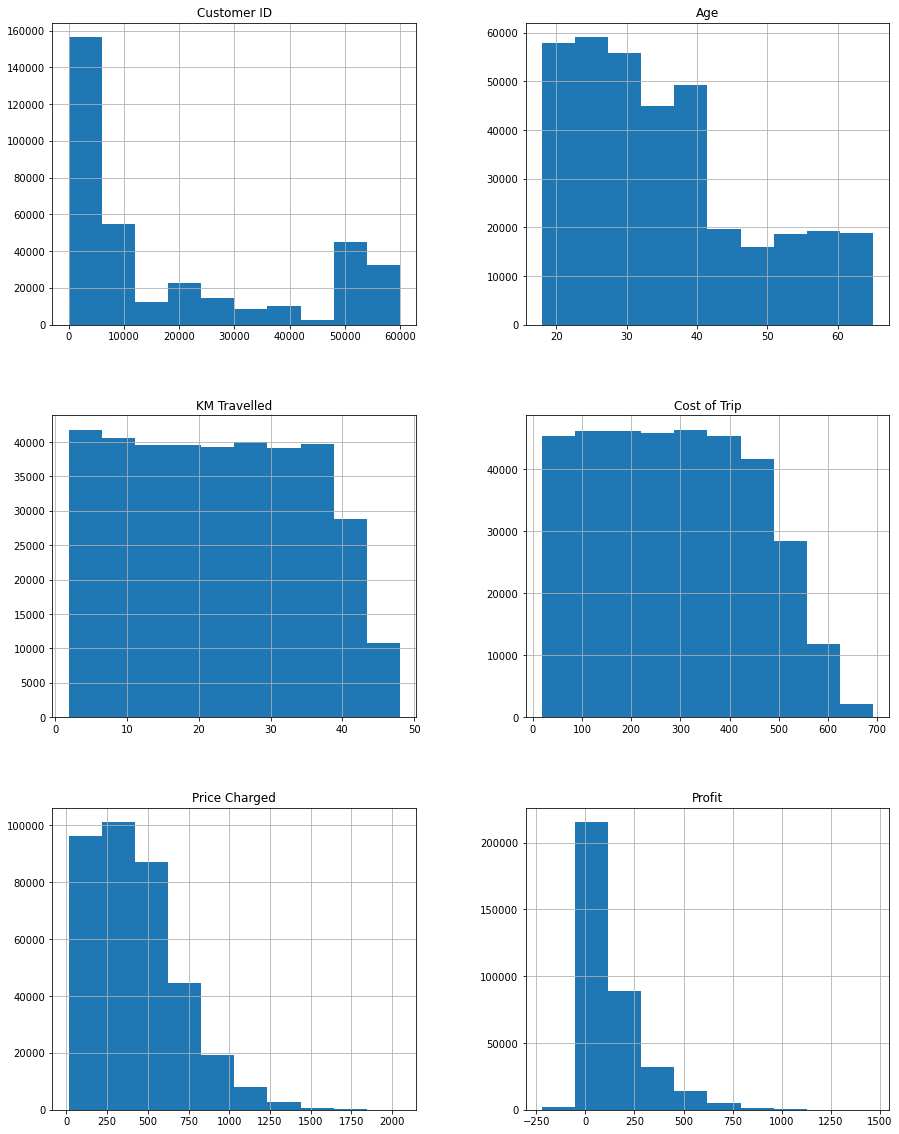

In [126]:
combined_df.hist(figsize= (15,20) );

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

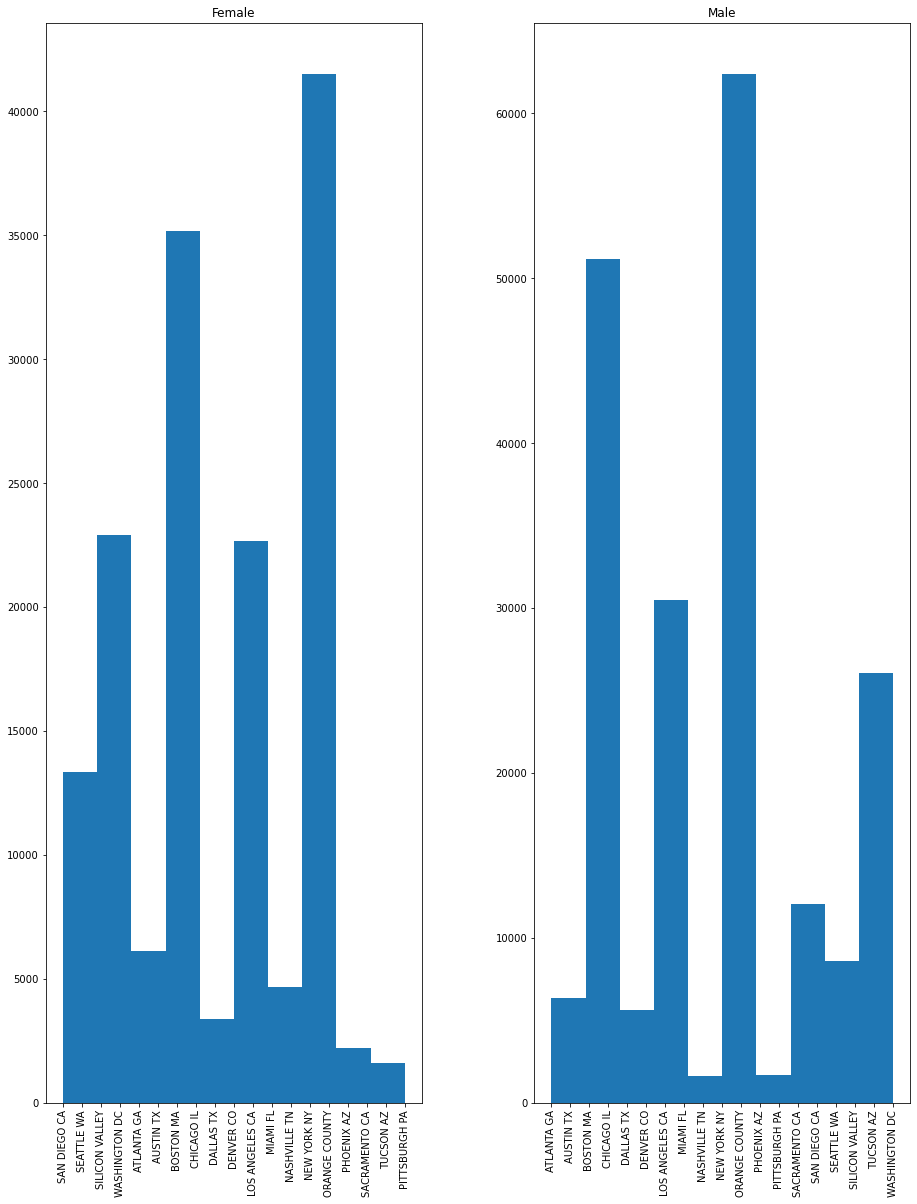

In [127]:
combined_df.hist(by= "Gender",column = "City", figsize= (15,20) )

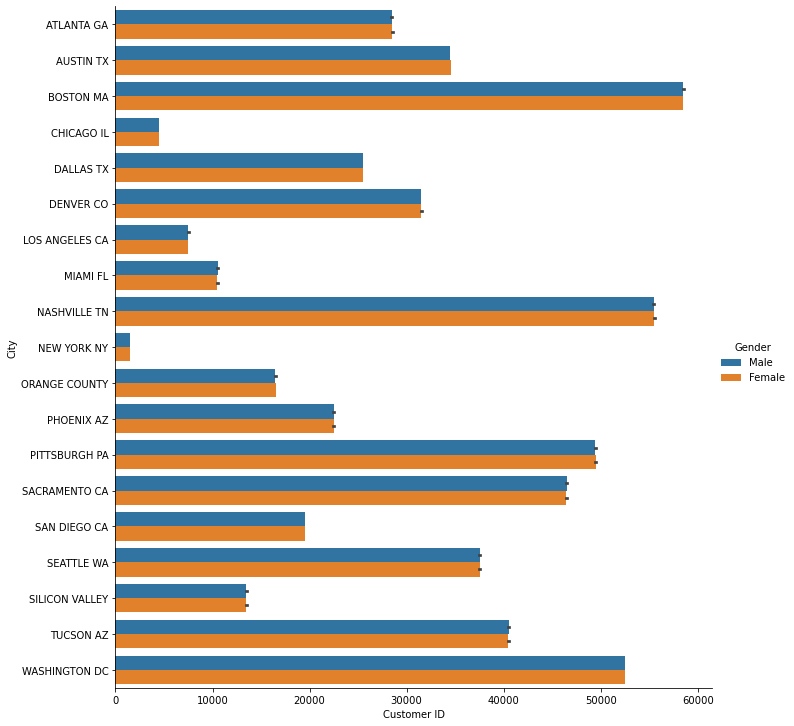

In [128]:
sns.catplot(x="Customer ID", y="City", hue="Gender", kind="bar", data=combined_df, height=10)

<AxesSubplot:xlabel='Company', ylabel='Profit'>

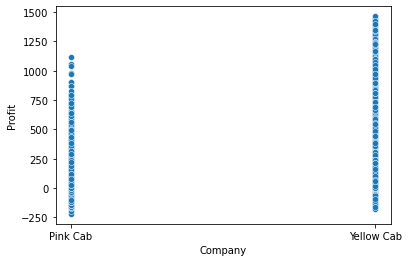

In [129]:
sns.scatterplot(x='Company', y = 'Profit', data = combined_df)

In [130]:
correlation= combined_df.corr()

In [131]:
correlation

,Customer ID,Age,KM Travelled,Cost of Trip,Price Charged,Profit
Customer ID,1.000000,-0.004735,0.000389,0.003077,-0.177324,-0.306527
Age,-0.004735,1.000000,-0.000369,-0.000189,-0.003084,-0.005093
KM Travelled,0.000389,-0.000369,1.000000,0.981848,0.835753,0.462768
Cost of Trip,0.003077,-0.000189,0.981848,1.000000,0.859812,0.486056
Price Charged,-0.177324,-0.003084,0.835753,0.859812,1.000000,0.864154
Profit,-0.306527,-0.005093,0.462768,0.486056,0.864154,1.000000


<AxesSubplot:>

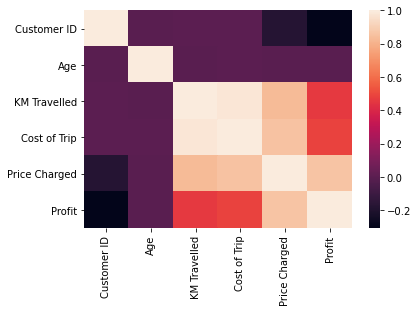

In [132]:
sns.heatmap(correlation, xticklabels= correlation.columns,
    yticklabels= correlation.columns,)

# After finishing the EDA, the insights can conclude that the Yellow Cab company is the right place to make the investment, due to the following reasons:

1- Yellow Cab revenue in years 2016 and 2018 is higher than Pink Cab.
<br>2- Yellow Cab attracts a larger number of customers.
<br>3- Yellow Cab has higher population all over the states which can be proved by the customers numbers in each state.


In [133]:
combined_df.to_excel("Combined Data.xlsx")

In [134]:
City_Company.to_excel("City Company Data.xlsx")